In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from src.website_fetching.edac_fetching import post_process_data, load_data, load_all_parent_directory,load_edac_from_website_dir, load_from_website

# Define the url and fields we want to fetch

In [3]:
parent_url0 = "https://archives.esac.esa.int/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/AOCS_AND_DMS_EDAC_CNTR/"
parent_url1 = "https://archives.esac.esa.int/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/NAVCAM_A_EDAC_CNTR/"
parent_url2 = "https://archives.esac.esa.int/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/NAVCAM_B_EDAC_CNTR/"
parent_url3 = "https://archives.esac.esa.int/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/STR_A_EDAC_CNTR/"
parent_url4 = "https://archives.esac.esa.int/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/STR_B_EDAC_CNTR/"
parent_url5 = "https://archives.esac.esa.int/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/STR_NB_SEU_FOUND/"
urls = [parent_url0, parent_url1, parent_url2, parent_url3, parent_url4, parent_url5]

# Fetch the data

In [67]:
index = 1
measures, res = await load_all_parent_directory(urls[index])

The links in the parents directory are:
['?C=N;O=D', '?C=M;O=A', '?C=S;O=A', '?C=D;O=A', '/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/', '2004_Q2/', '2004_Q3/', '2004_Q4/', '2005_Q1/', '2005_Q2/', '2005_Q3/', '2005_Q4/', '2006_Q1/', '2006_Q4/', '2007_Q1/', '2007_Q2/', '2007_Q3/', '2007_Q4/', '2008_Q1/', '2008_Q3/', '2009_Q1/', '2009_Q3/', '2009_Q4/', '2010_Q1/', '2010_Q2/', '2010_Q3/', '2011_Q1/', '2014_Q1/', '2014_Q2/', '2014_Q3/', '2014_Q4/', '2015_Q1/', '2015_Q2/', '2015_Q3/', '2015_Q4/', '2016_Q1/', '2016_Q2/', '2016_Q3/']
The measures found for this directory are:
['NACP1801', 'NACP1800']


Loading instruments ['NACP1801', 'NACP1800']:  12%|█▏        | 4/33 [00:06<00:43,  1.50s/it]


CancelledError: 

In [ ]:
# Debug res haha
res0 = [r[0] for r in res]
res1 = [r[1] for r in res]
res1

# Simple post fetching transformations

In [ ]:
data, files = post_process_data(res, measures, frequency='h')
files

# Save the data into a CSV

In [ ]:
directory_path = "DATA/rosetta_engineering_hourly/"
for name, d in data.items():
    file_name = f"daily-{name}.csv"
    d.to_csv(directory_path + file_name)

In [4]:
# Load all the links from the website
async def load_and_save_enac_from_esa_website(url: str, directory_path: str):
    measures, res = await load_all_parent_directory(url)
    data, files = post_process_data(res, measures, frequency='h')
    
    for name, d in data.items():
        file_name = f"daily-{name}.csv"
        d.to_csv(directory_path + file_name)
        
directory_path = "DATA/rosetta_engineering_hourly/"
for url in urls[2:]:
    await load_and_save_enac_from_esa_website(url, directory_path)

The links in the parents directory are:
['?C=N;O=D', '?C=M;O=A', '?C=S;O=A', '?C=D;O=A', '/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/', '2004_Q2/', '2004_Q3/', '2004_Q4/', '2005_Q1/', '2005_Q3/', '2005_Q4/', '2006_Q1/', '2006_Q4/', '2007_Q2/', '2007_Q3/', '2007_Q4/', '2008_Q1/', '2008_Q3/', '2009_Q1/', '2009_Q3/', '2009_Q4/', '2010_Q1/', '2010_Q2/', '2010_Q3/', '2011_Q1/', '2014_Q1/', '2015_Q3/', '2016_Q2/']
The measures found for this directory are:
['NACP2800', 'NACP2801']


Loading instruments ['NACP2800', 'NACP2801']: 100%|██████████| 23/23 [00:43<00:00,  1.91s/it]


The links in the parents directory are:
['?C=N;O=D', '?C=M;O=A', '?C=S;O=A', '?C=D;O=A', '/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/', '2004_Q1/', '2004_Q2/', '2004_Q3/', '2004_Q4/', '2005_Q1/', '2005_Q2/', '2005_Q3/', '2005_Q4/', '2006_Q1/', '2006_Q2/', '2006_Q3/', '2006_Q4/', '2007_Q1/', '2007_Q2/', '2007_Q3/', '2007_Q4/', '2008_Q1/', '2008_Q2/', '2008_Q3/', '2008_Q4/', '2009_Q1/', '2009_Q2/', '2009_Q3/', '2009_Q4/', '2010_Q1/', '2010_Q2/', '2010_Q3/', '2010_Q4/', '2011_Q1/', '2011_Q2/', '2014_Q1/', '2014_Q2/', '2014_Q3/', '2014_Q4/', '2015_Q1/', '2015_Q2/', '2015_Q3/', '2015_Q4/', '2016_Q1/', '2016_Q2/', '2016_Q3/']
The measures found for this directory are:
['NACP1301', 'NACW1L0P', 'NACP1300', 'NACW1L0Q']


Loading instruments ['NACP1301', 'NACW1L0P', 'NACP1300', 'NACW1L0Q']: 100%|██████████| 41/41 [05:21<00:00,  7.83s/it]


The links in the parents directory are:
['?C=N;O=D', '?C=M;O=A', '?C=S;O=A', '?C=D;O=A', '/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/', '2004_Q1/', '2004_Q2/', '2004_Q3/', '2004_Q4/', '2005_Q1/', '2005_Q2/', '2005_Q3/', '2005_Q4/', '2006_Q1/', '2006_Q2/', '2006_Q3/', '2006_Q4/', '2007_Q1/', '2007_Q2/', '2007_Q3/', '2007_Q4/', '2008_Q1/', '2008_Q2/', '2008_Q3/', '2008_Q4/', '2009_Q1/', '2009_Q2/', '2009_Q3/', '2009_Q4/', '2010_Q1/', '2010_Q2/', '2010_Q3/', '2010_Q4/', '2011_Q1/', '2011_Q2/', '2014_Q1/', '2014_Q2/', '2014_Q3/', '2014_Q4/', '2015_Q1/', '2015_Q2/', '2015_Q3/', '2015_Q4/', '2016_Q1/', '2016_Q2/', '2016_Q3/']
The measures found for this directory are:
['NACP2301', 'NACP2300', 'NACW1L1J', 'NACW1L1I']


Loading instruments ['NACP2301', 'NACP2300', 'NACW1L1J', 'NACW1L1I']: 100%|██████████| 41/41 [04:42<00:00,  6.88s/it]


The links in the parents directory are:
['?C=N;O=D', '?C=M;O=A', '?C=S;O=A', '?C=D;O=A', '/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/', '2004_Q1/', '2004_Q2/', '2004_Q3/', '2004_Q4/', '2005_Q1/', '2005_Q2/', '2005_Q3/', '2005_Q4/', '2006_Q1/', '2006_Q2/', '2006_Q3/', '2006_Q4/', '2007_Q1/', '2007_Q2/', '2007_Q3/', '2007_Q4/', '2008_Q1/', '2008_Q2/', '2008_Q3/', '2008_Q4/', '2009_Q1/', '2009_Q2/', '2009_Q3/', '2009_Q4/', '2010_Q1/', '2010_Q2/', '2010_Q3/', '2010_Q4/', '2011_Q1/', '2011_Q2/', '2014_Q1/', '2014_Q2/', '2014_Q3/', '2014_Q4/', '2015_Q1/', '2015_Q2/', '2015_Q3/', '2015_Q4/', '2016_Q1/', '2016_Q2/', '2016_Q3/']
The measures found for this directory are:
['NACW1K2X', 'NACW1K0H']


Loading instruments ['NACW1K2X', 'NACW1K0H']: 100%|██████████| 41/41 [02:50<00:00,  4.15s/it]


# Plot the EDAC data from the rosetta_engineering measures

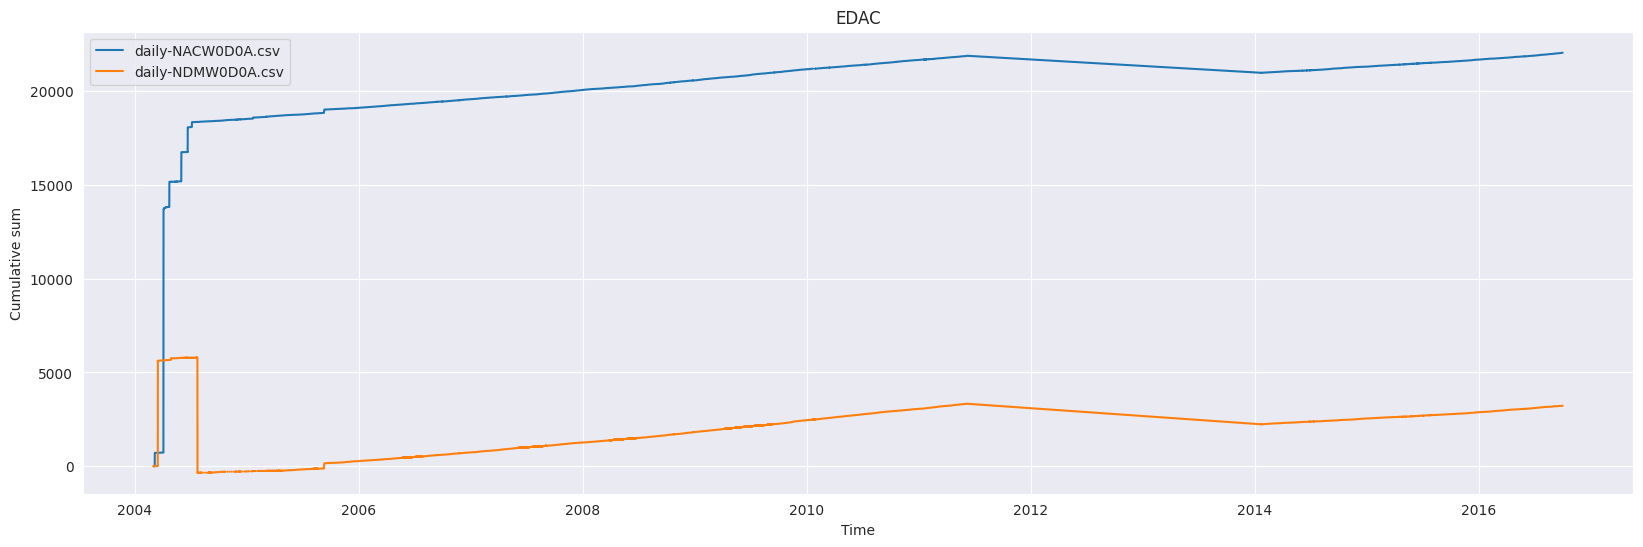

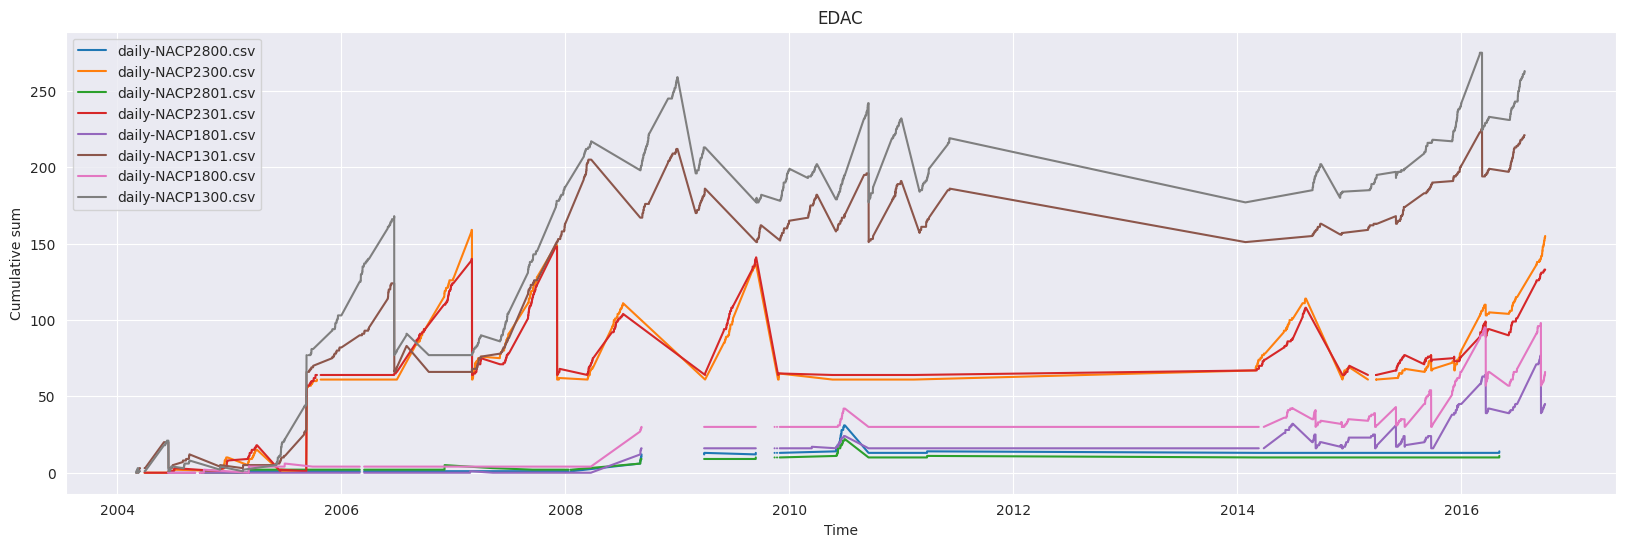

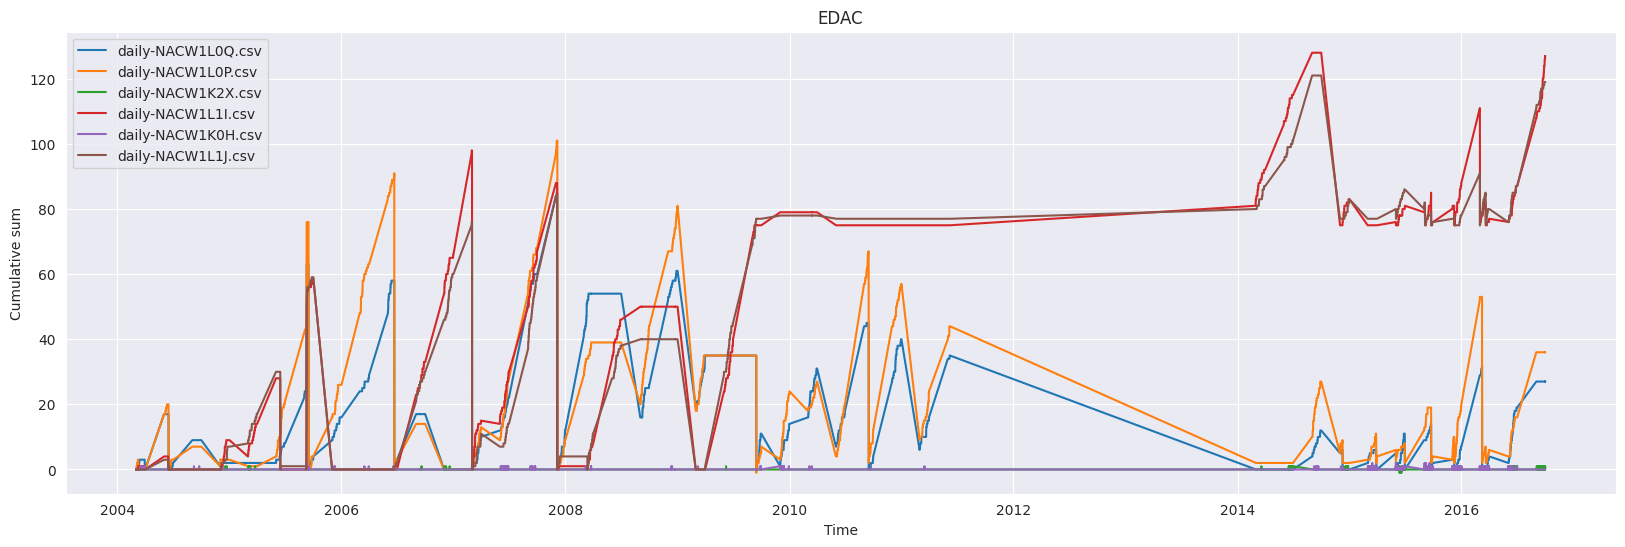

In [5]:
def load_engineering_param(file_path):
    data = pd.read_csv(file_path, index_col=0)
    data.index = pd.to_datetime(data.index)
    return data

def plot_ENAC_instruments(name_filters: list[str], files: list[str], directory_path: str, correct: bool = True):
    files = list(filter(lambda x: any([name_filter in x for name_filter in name_filters]), files))
    file_paths = [directory_path + file for file in files]
    data = [load_engineering_param(file_path) for file_path in file_paths]
    # Compute the derivative of the data
    diff_data = [d.diff() for d in data]
    
    if correct:
        # Remove negative diff values
        for i, d in enumerate(diff_data):
            d[d < 0] = 0
            diff_data[i] = d
    cumsum_data = [d.cumsum() for d in diff_data]
    
    # Plot the data
    fig, ax = plt.subplots(figsize=(20, 6))
    for i, d in enumerate(cumsum_data):
        ax.plot(d, label=files[i])
        plt.legend()
        plt.title("EDAC")
        plt.xlabel("Time")
        plt.ylabel("Cumulative sum")
    plt.show()
directory_path = "DATA/rosetta_engineering_hourly/"
files = os.listdir(directory_path)

plot_ENAC_instruments(["NACW0", "NDM"], files, directory_path, correct=False)
plot_ENAC_instruments(["NACP"], files, directory_path, correct=False)
plot_ENAC_instruments(["NACW1"], files, directory_path, correct=False)

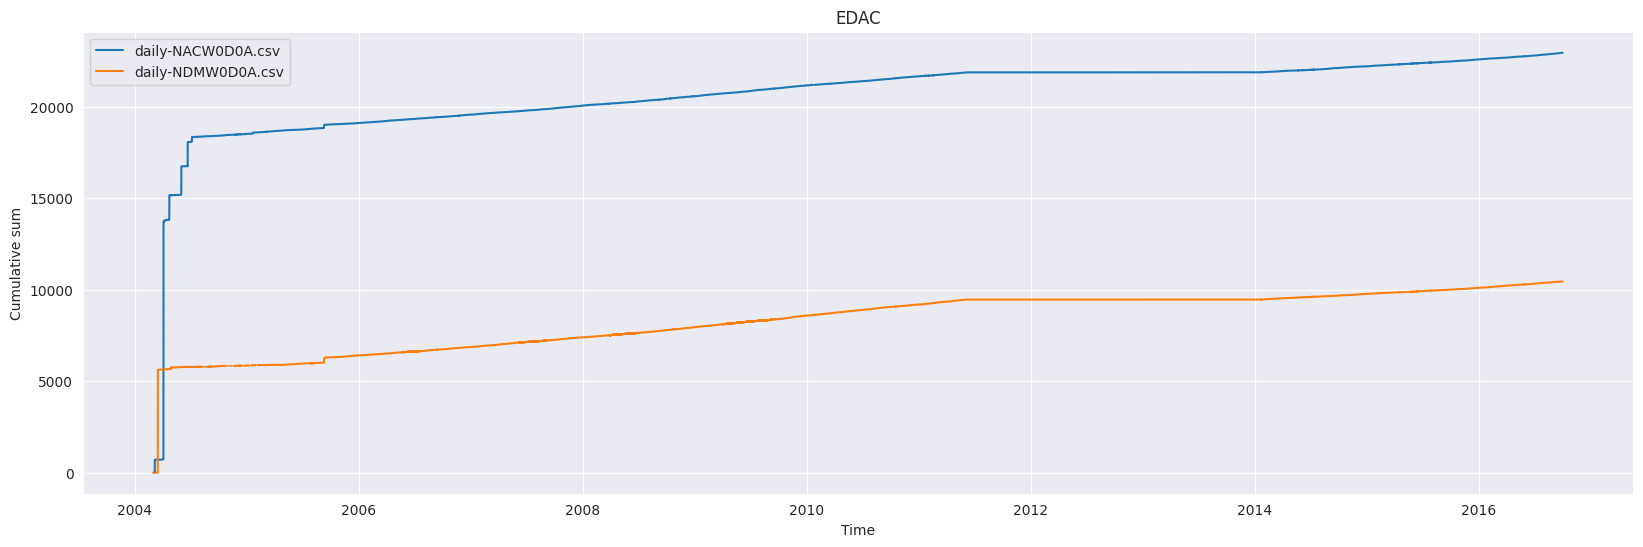

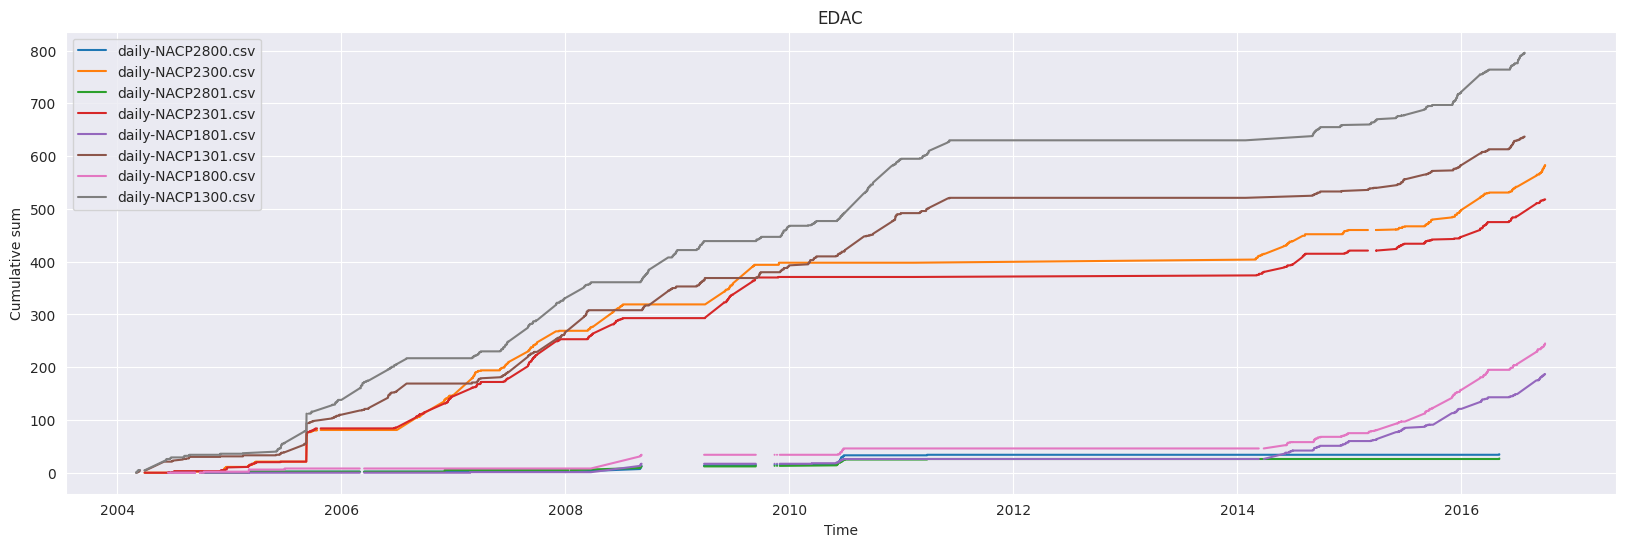

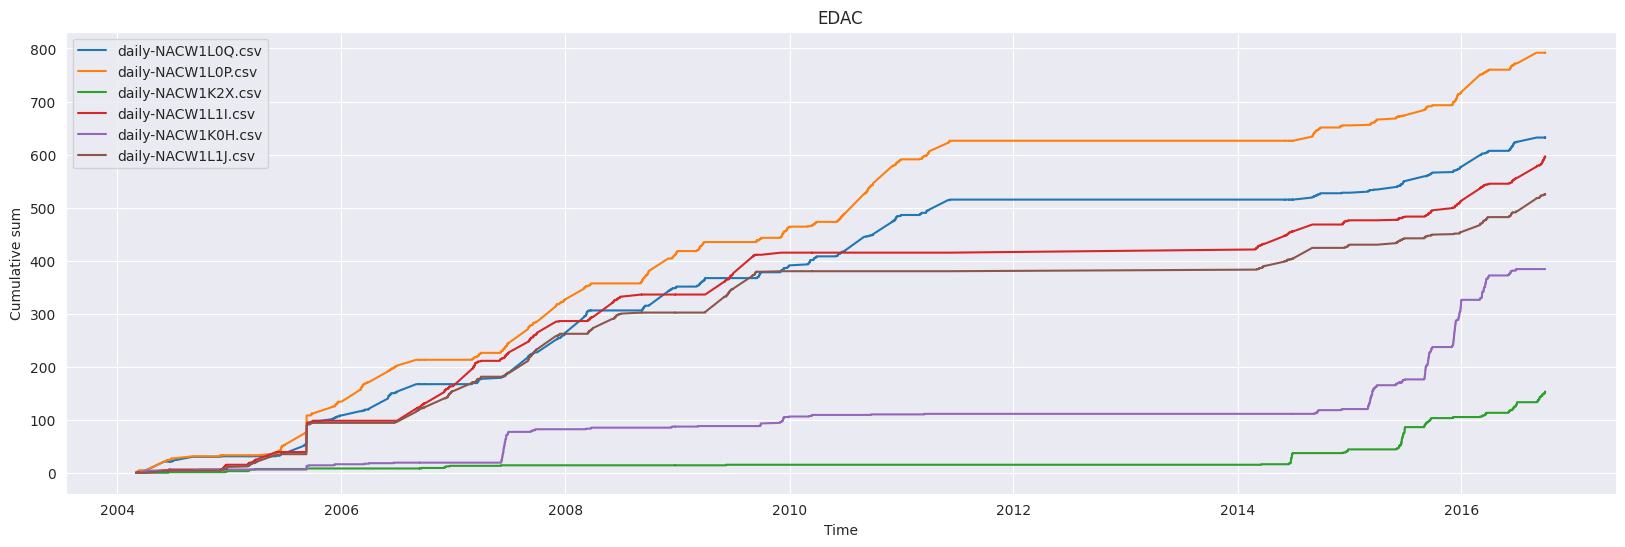

In [6]:
plot_ENAC_instruments(["NACW0", "NDM"], files, directory_path, correct=True)
plot_ENAC_instruments(["NACP"], files, directory_path, correct=True)
plot_ENAC_instruments(["NACW1"], files, directory_path, correct=True)